In [2]:
### First install the proper libraries
# Run the script to see the Bollinger Bands plot and analysis for BTC ###

In [3]:
! pip install yfinance pandas pandas_ta matplotlib

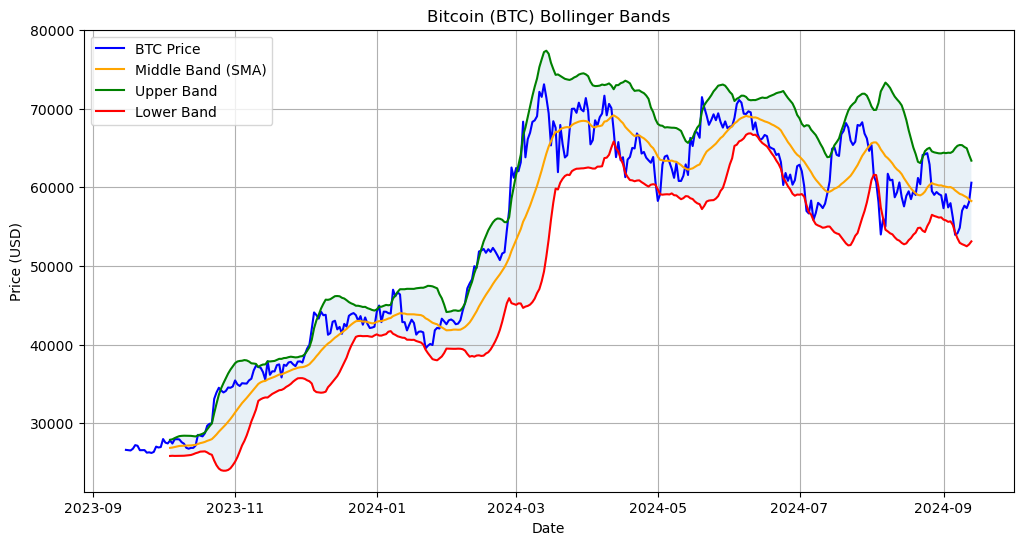

Current BTC Price: $60571.30
Middle Band: $58243.21
Upper Band: $63373.64
Lower Band: $53112.79
Bollinger Bandwidth: 0.1762
BTC is currently trading within the Bollinger Bands


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_btc_data(start_date, end_date):
    btc = yf.Ticker("BTC-USD")
    data = btc.history(start=start_date, end=end_date)
    return data

def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    
    return rolling_mean, upper_band, lower_band

def plot_bollinger_bands(data, middle_band, upper_band, lower_band):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='BTC Price', color='blue')
    plt.plot(data.index, middle_band, label='Middle Band (SMA)', color='orange')
    plt.plot(data.index, upper_band, label='Upper Band', color='green')
    plt.plot(data.index, lower_band, label='Lower Band', color='red')
    plt.fill_between(data.index, upper_band, lower_band, alpha=0.1)
    plt.title('Bitcoin (BTC) Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_bollinger_bands(data, middle_band, upper_band, lower_band):
    current_price = data['Close'].iloc[-1]
    current_middle = middle_band.iloc[-1]
    current_upper = upper_band.iloc[-1]
    current_lower = lower_band.iloc[-1]
    
    print(f"Current BTC Price: ${current_price:.2f}")
    print(f"Middle Band: ${current_middle:.2f}")
    print(f"Upper Band: ${current_upper:.2f}")
    print(f"Lower Band: ${current_lower:.2f}")
    
    bandwidth = (current_upper - current_lower) / current_middle
    print(f"Bollinger Bandwidth: {bandwidth:.4f}")
    
    if current_price > current_upper:
        print("BTC is currently trading above the upper Bollinger Band (potentially overbought)")
    elif current_price < current_lower:
        print("BTC is currently trading below the lower Bollinger Band (potentially oversold)")
    else:
        print("BTC is currently trading within the Bollinger Bands")

def main():
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)  # Fetch 1 year of data
    
    btc_data = fetch_btc_data(start_date, end_date)
    
    middle_band, upper_band, lower_band = calculate_bollinger_bands(btc_data)
    
    plot_bollinger_bands(btc_data, middle_band, upper_band, lower_band)
    analyze_bollinger_bands(btc_data, middle_band, upper_band, lower_band)

if __name__ == "__main__":
    main()

In [20]:
# This code does the following: 
1. # Imports necessary libraries: pandas for data manipulation, numpy for numerical operations, yfinance for fetching Bitcoin data (matplotlib for plotting).#
2. # Defines a function fetch_btc_data() to retrieve Bitcoin price data for the last year using yfinance.
3. # Implements calculate_bollinger_bands() to compute Bollinger Bands with a 20-day window and 2 standard deviations.
4. # Creates plot_bollinger_bands() to visualize the Bitcoin price along with the Bollinger Bands.
5. # Includes analyze_bollinger_bands() to provide insights on the current price position relative to the bands, bandwidth analysis, and potential trading signals.
6. # The main() function orchestrates the entire process, fetching data, calculating Bollinger Bands, plotting, and analyzing. #

6.0